In [14]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Prepare dataset

In [15]:
df = pd.read_csv('laptops.csv')

In [16]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [17]:
print(df.shape)

(2160, 12)


In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [20]:
base = ['ram', 'storage', 'screen', 'final_price']
df = df[base]

In [21]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### EDA 

C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

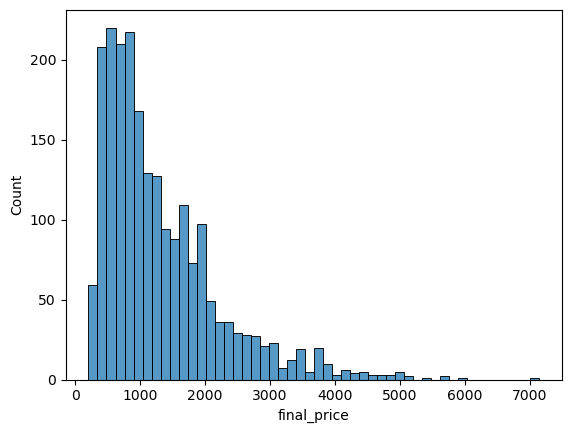

In [22]:
sns.histplot(df.final_price, bins=50)

C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


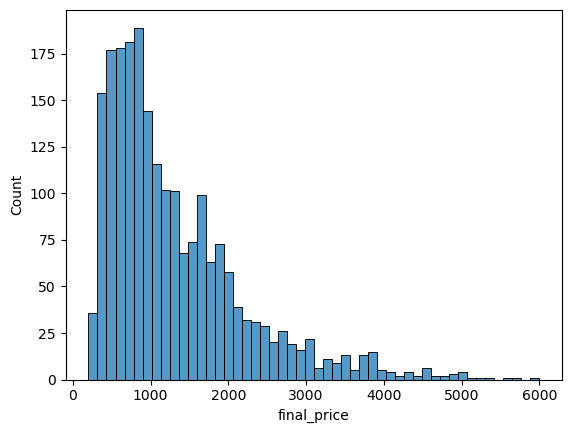

In [25]:
sns.histplot(df.final_price[df.final_price < 7000], bins=50)
plt.show()

In [28]:
priceLog = np.log1p(df.final_price)

C:\Users\Admin-IT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

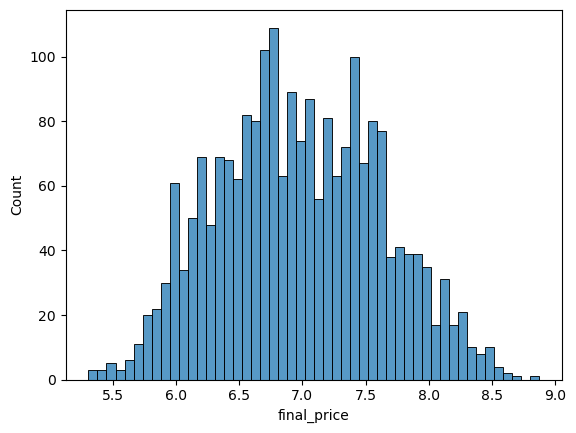

In [29]:
sns.histplot(priceLog, bins=50)

#### Question 1.Missing values 

In [13]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

#### Question 2.Median for RAM

In [30]:
medRam = df['ram'].median()
print(f"The median for RAM is {medRam}")

The median for RAM is 16.0


##### Prepare, split, shuffle dataset(Train, val ,Test)

In [35]:
n = len(df)
n_val = int (n * 0.2)
n_test = int (n * 0.2)
n_train = n - n_val - n_test
n, n_val + n_test + n_train

(2160, 2160)

In [36]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [38]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [39]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [40]:
df_val

,ram,storage,screen,final_price
0,32,1000,16.0,2599.00
1,16,512,15.6,999.00
2,12,512,15.6,477.28
3,8,256,13.6,1519.00
4,8,512,15.6,402.99
...,...,...,...,...
427,8,128,13.0,1049.00
428,8,256,13.3,799.00
429,8,512,14.0,565.54
430,16,512,14.0,738.00


In [41]:
df_test

,ram,storage,screen,final_price
0,32,1000,15.6,4805.65
1,16,512,13.0,2189.00
2,16,512,15.6,1349.00
3,16,512,15.0,2175.83
4,16,1000,15.6,1248.59
...,...,...,...,...
427,8,512,15.0,1838.29
428,8,256,15.6,531.80
429,8,256,13.3,765.33
430,8,512,14.0,803.61


In [42]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [43]:
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [44]:
y_val

array([7.86326672, 6.90775528, 6.17019634, 7.32646561, 6.00139013,
       6.74523635, 7.3115924 , 6.72143775, 6.10924758, 8.24794549,
       7.13933514, 7.54960917, 6.78773224, 7.09007684, 6.38181602,
       7.09007684, 5.53101513, 6.89770494, 7.25135208, 6.2146081 ,
       6.12102243, 6.63138235, 7.32711672, 6.34814199, 8.36660051,
       6.03975459, 7.19758504, 7.54960917, 7.54961443, 6.18517929,
       7.64969262, 7.86327057, 6.56667243, 6.23441073, 7.21971524,
       7.74846002, 6.63333159, 7.15807032, 7.54960917, 7.17012724,
       7.10497366, 7.97280734, 6.62007321, 6.29156914, 6.62007321,
       6.49885427, 7.57558978, 8.2160908 , 6.82634998, 7.98989937,
       6.91770561, 6.57786136, 7.31277362, 7.17011954, 6.80461452,
       6.38012254, 7.60579547, 6.7580945 , 7.05875815, 6.70033743,
       7.60090246, 6.24999455, 7.48380669, 6.40867705, 5.81484669,
       7.31322705, 6.64476582, 5.79301361, 6.68461173, 6.27287701,
       6.77992191, 6.25575004, 7.69943472, 6.9445307 , 6.62007

In [45]:
y_test

array([8.47775565, 7.69165682, 7.20785987, 7.68562497, 7.13057078,
       6.32076829, 6.49932077, 7.24422752, 7.17012724, 6.53077558,
       7.49214173, 7.43838353, 6.30991828, 7.20076066, 6.82328612,
       7.37775891, 6.50382399, 7.9373747 , 7.10660614, 7.56664222,
       6.22059017, 7.26822302, 6.57527108, 6.55108034, 7.69621264,
       7.97246602, 6.47906248, 6.78670566, 7.43838941, 6.70930434,
       7.24422752, 6.90775528, 6.68586095, 7.17012724, 6.73933663,
       7.07625678, 7.68955873, 7.7406644 , 7.37149558, 7.20785987,
       7.64969262, 6.90775528, 5.76186269, 8.24275635, 6.60074087,
       8.1019777 , 6.44573569, 6.77659821, 7.17011954, 7.40853057,
       6.89817958, 6.4248204 , 6.68461173, 6.08121384, 5.48168005,
       8.03915739, 6.14474342, 7.38770924, 7.04751722, 6.9982265 ,
       6.28821166, 6.2146081 , 6.27287701, 7.30809394, 6.30991828,
       6.90775528, 8.01072141, 7.02286809, 7.57558465, 5.70378247,
       5.97169542, 5.94017125, 6.2146081 , 7.37775891, 7.95402

In [46]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

#### Question 3.Filling NAs

In [47]:
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

In [48]:
df_train_zero= df_train.fillna(0)
df_train_zero.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [50]:
df_train_mean = df_train.copy()
df_train_mean['screen'] = df_train['screen'].fillna(df_train['screen'].mean())
df_train_mean.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [52]:
df_val_zero = df_val.fillna(0)
df_val_mean = df_val.copy()
df_val_mean['screen'] = df_val['screen'].fillna(df_train['screen'].mean())

In [54]:
def train_linear_regression(X, y):
    Xb = np.c_[np.ones(X.shape[0]), X]
    z = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
    a = z[0]
    b = z[1:]

    return a, b
    
    

In [58]:
def rmse(y, y_p):
    se = (y - y_p) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    

In [59]:
def prepare(df):
    df = df.copy()
    X = df.values
    return X

In [60]:
X_train_zero = prepare(df_train_zero)
w0, w = train_linear_regression(X_train_zero, y_train)
X_val = prepare(df_val_zero)
y_p = w0 + X_val.dot(w)
result_zero = rmse(y_val, y_p)

X_train_mean = prepare(df_train_mean)
w0, w = train_linear_regression(X_train_mean, y_train)
y_p = w0 + X_val.dot(w)
result_mean = rmse(y_val, y_p)
print(f'Fillna 0: {round(result_zero, 2)}\n Mean: {round(result_mean, 2)}')

Fillna 0: 0.43
 Mean: 0.43


#### Question 4. Regularization

In [62]:
def prepare_X(df): 
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [63]:
def train_linear_regression_reg(X, y, r=0.001): 

    
    X_with_bias = np.c_[np.ones(X.shape[0]), X]  

   

    XTX = X_with_bias.T.dot(X_with_bias)
    XTX += r * np.eye(XTX.shape[0])
    
    theta = np.linalg.inv(XTX).dot(X_with_bias.T).dot(y)
    
   
    b = theta[0]       
    w = theta[1:]     
    
    return b, w

In [64]:
print("Before the log1p")
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r) 
    
    X_val = prepare_X(df_val) 
    y_pred = w0 + X_val.dot(w) 
    score = rmse(y_val, y_pred)
    print(f'r is: {r}, Weights are: {w0}, Score is: {round(score, 2)}')

Before the log1p
r is: 0, Weights are: 6.7271637061124805, Score is: 0.43
r is: 0.01, Weights are: 6.721004333260219, Score is: 0.43
r is: 0.1, Weights are: 6.666075503828108, Score is: 0.43
r is: 1, Weights are: 6.162616499461252, Score is: 0.43
r is: 5, Weights are: 4.616086176497313, Score is: 0.46
r is: 10, Weights are: 3.5167547207936254, Score is: 0.51
r is: 100, Weights are: 0.6849263362660136, Score is: 0.67


In [65]:
print("After  the log1p ")
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w) 
    y_pred_original = np.expm1(y_pred)
    y_val_original = np.expm1(y_val)
    score = rmse(y_val_original, y_pred_original)
    print(f'r is: {r}, Weights are: {w0}, Score is: {round(score, 2)}')

After  the log1p 
r is: 0, Weights are: 6.7271637061124805, Score is: 716.51
r is: 0.01, Weights are: 6.721004333260219, Score is: 716.53
r is: 0.1, Weights are: 6.666075503828108, Score is: 716.74
r is: 1, Weights are: 6.162616499461252, Score is: 720.41
r is: 5, Weights are: 4.616086176497313, Score is: 744.13
r is: 10, Weights are: 3.5167547207936254, Score is: 772.71
r is: 100, Weights are: 0.6849263362660136, Score is: 908.73


#### Question 5. RMSE spread 

In [66]:
def split_dataset(df, seed):
    
    n = len(df)
    df = df.copy()
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    
    df_train_seed = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val_seed = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test_seed = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)


    y_train_seed = df_train_seed.pop('final_price').values
    y_val_seed = df_val_seed.pop('final_price').values
    y_test_seed = df_test_seed.pop('final_price').values

    return df_train_seed, df_val_seed, df_test_seed, y_train_seed, y_val_seed, y_test_seed

In [68]:
score = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, i)
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val) 
    y_pred = w0 + X_val.dot(w)
    score.append(rmse(y_val, y_pred))
    print(f"Seed : {i} and RMSE : {rmse(y_val, y_pred)}\n")


print("Total RMSE : ", score)
std = np.std(score)
print(std)
print(f'\nTotal std :{round(std, 3)}')

Seed : 0 and RMSE : 565.4520868770995

Seed : 1 and RMSE : 636.7985423056726

Seed : 2 and RMSE : 588.955869790796

Seed : 3 and RMSE : 597.8148920012515

Seed : 4 and RMSE : 571.962791511103

Seed : 5 and RMSE : 573.238325661895

Seed : 6 and RMSE : 647.3438328407194

Seed : 7 and RMSE : 550.4398184485962

Seed : 8 and RMSE : 587.3335036169963

Seed : 9 and RMSE : 576.101792943313

Total RMSE :  [565.4520868770995, 636.7985423056726, 588.955869790796, 597.8148920012515, 571.962791511103, 573.238325661895, 647.3438328407194, 550.4398184485962, 587.3335036169963, 576.101792943313]
29.176491258292383

Total std :29.176


#### Question 6

In [69]:
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, 9)

In [70]:
df_train_val = pd.concat([df_train, df_val])
df_train_val = df_train_val.reset_index(drop=True)
df_train_val

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0
...,...,...,...
1723,16,512,14.0
1724,16,512,13.3
1725,8,256,15.6
1726,16,512,15.6


In [71]:
y_train_val = np.concatenate([y_train, y_val])

In [73]:
X_train_val = prepare_X(df_train_val)
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001) 
X_test = prepare_X(df_test) 
y_pred = w0 + X_test.dot(w)  
result = rmse(y_test, y_pred)
result

608.6099822049559